In [4]:
import os
import sys
from pathlib import Path
# set path to library
sys.path.append(f'{Path(os.getcwd()).parent.as_posix()}')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from xyzeq import *

In [8]:
data = load_data_for_notebook()
all_genes = np.asarray(data.var.index)

data = load_data_for_notebook()
# Remove all genes for which hepatocytes have fewer than count_min counts
data = filter_genes_mincount_hepatocytes(data, count_min=100)

# should we normalize the counts??
normalize = True
data = normalize_data(data) if normalize else data


In [9]:
# add data describing percentage of tumor cells within different layers around each grid cell
data = add_tumor_spatial_data(data)

Processing Tumor Spatial Information: 100%|██████████| 5/5 [00:34<00:00,  6.94s/it]


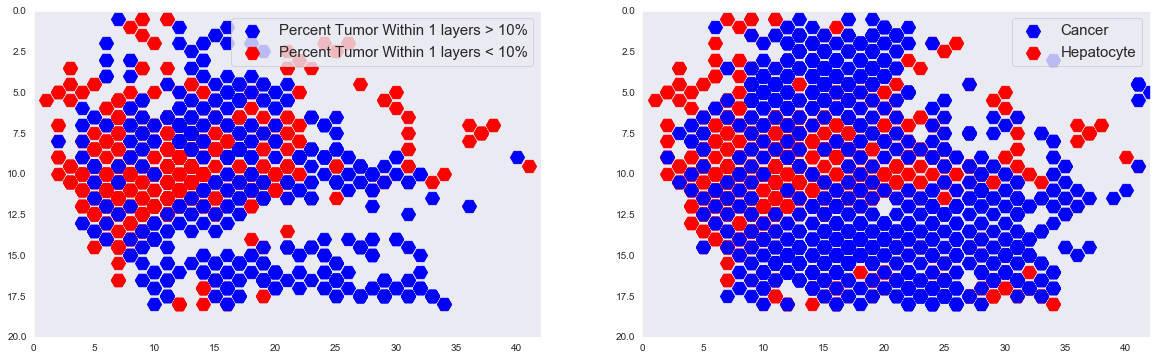

In [10]:
# Define layer and percentage cutoff
layer = 1
perc = 0.1

# Split grid cells based on cutoff
grouping_fn = lambda data: ((data.obs[f'Percent_Tumor_{layer}'] > perc))
hepatocytes = subselect_data(data, 'Hepatocyte', grouping_fn)
fig = plot_grouping(hepatocytes, data, layer, perc)

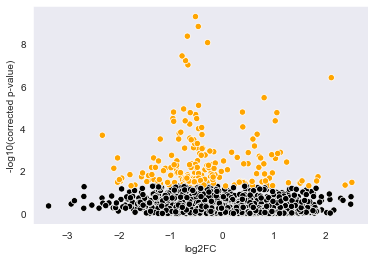

In [11]:
# Perform Mann Whitney test and plot results
test, results = perform_mann_whitney(hepatocytes, all_genes)
test.plot_volcano(corrected_pval=True, size=40, save=None)

In [12]:
results.head()

,Gene,Pval,Qval
0,mm10_Cps1,1.135321e-13,5.188418e-10
1,mm10_Dpyd,6.617312e-13,1.512056e-09
2,mm10_Hnf1aos1,2.855939e-12,4.350547e-09
3,mm10_Malat1,7.639447e-12,8.728069e-09
4,mm10_Slc7a2,4.062683e-11,3.713292e-08
